### CSCN8030 : AI for Business Decision
#### Global food production distribution analysis and optimization

##### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


#### Load and clean dataset

In [2]:

crop_df = pd.read_csv(".\\data\\crop1.csv")
live_df = pd.read_csv(".\\data\\live1.csv")

In [15]:
crop_df

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0
...,...,...,...,...,...,...
1895970,Net Food Importing Developing Countries,Wheat,Production,2016,tonnes,52845182.0
1895971,Net Food Importing Developing Countries,Wheat,Production,2017,tonnes,57099662.0
1895972,Net Food Importing Developing Countries,Wheat,Production,2018,tonnes,55571780.0
1895973,Net Food Importing Developing Countries,Wheat,Production,2019,tonnes,53903035.0


In [16]:
live_df

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0
...,...,...,...,...,...,...
122453,Net Food Importing Developing Countries,Sheep,Stocks,2016,Head,364166482.0
122454,Net Food Importing Developing Countries,Sheep,Stocks,2017,Head,371357850.0
122455,Net Food Importing Developing Countries,Sheep,Stocks,2018,Head,377303293.0
122456,Net Food Importing Developing Countries,Sheep,Stocks,2019,Head,397970957.0


##### Check Null data and clean data

In [3]:
corp_nulls = crop_df.isnull().sum()
print("-------------------")
print("Corp.csv")
print("-------------------")
print(corp_nulls)
live_nulls = live_df.isnull().sum()
print("-------------------")
print("\nLive.csv")
print("-------------------")
print(live_nulls)


-------------------
Corp.csv
-------------------
Area            0
Item            0
Element         0
Year            0
Unit            0
Value      129500
dtype: int64
-------------------

Live.csv
-------------------
Area          0
Item          0
Element       0
Year          0
Unit          0
Value      2264
dtype: int64


##### Filter clean data

In [4]:
crop_df_cleaned = crop_df[crop_df['Value'].notnull() & (crop_df['Value'] > 0)]
live_df_cleaned = live_df[live_df['Value'].notnull() & (live_df['Value'] > 0)]

##### Validate clean dataset

In [5]:
# Check for any remaining missing values
print("Missing values after cleaning:")
print(crop_df_cleaned.isnull().sum())
print(live_df_cleaned.isnull().sum())

Missing values after cleaning:
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64
Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64


#### Exploratory Data Analysis

##### Identify corps which produced most ( worldwide )

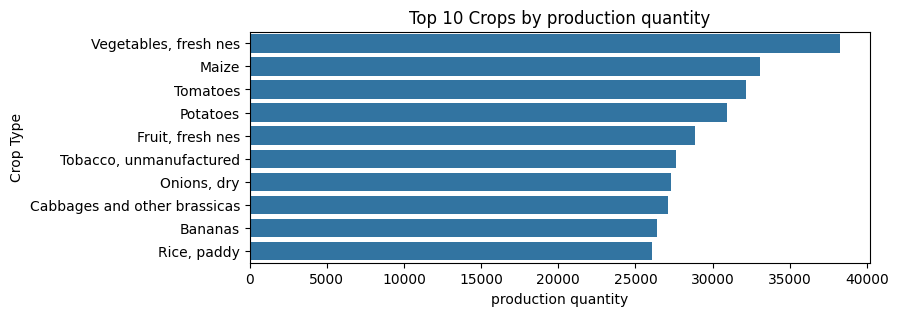

In [6]:

# Top crops
top_crops = crop_df_cleaned['Item'].value_counts().head(10)
crop_trend = crop_df_cleaned.groupby('Year')['Value'].sum() # Trend of crop production over the years

plt.figure(figsize=(8, 3)) # Top crops by frequency
sns.barplot(x=top_crops.values, y=top_crops.index)
plt.title("Top 10 Crops by production quantity")
plt.xlabel("production quantity")
plt.ylabel("Crop Type")
plt.show()

##### Identify livestock which produced most ( worldwide )

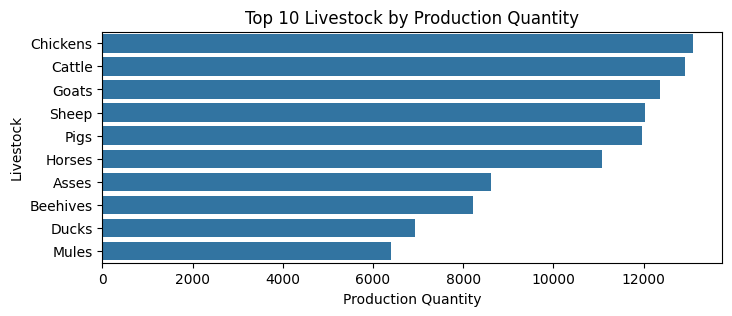

In [22]:
# Top livestock
top_livestock = live_df_cleaned['Item'].value_counts().head(10)
livestock_trend = live_df_cleaned.groupby('Year')['Value'].sum() # Trend of livestock stocks over the years

plt.figure(figsize=(8, 3)) # Top livestock by frequency
sns.barplot(x=top_livestock.values, y=top_livestock.index)
plt.title("Top 10 Livestock by Production Quantity")
plt.xlabel("Production Quantity")
plt.ylabel("Livestock")
plt.show()

##### Understand Production trend with time : corps

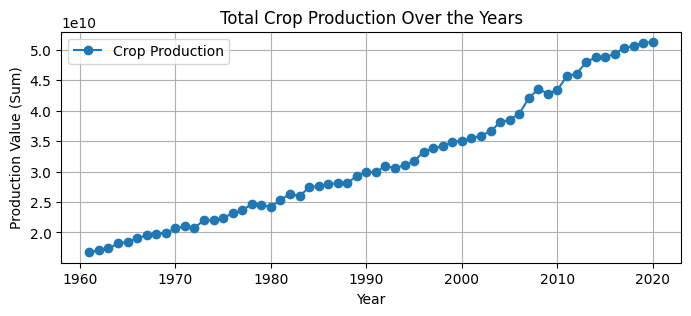

In [24]:
# Crop production trend over the years
plt.figure(figsize=(8, 3)) 
plt.plot(crop_trend.index, crop_trend.values, marker='o', label="Crop Production")
plt.title("Total Crop Production Over the Years")
plt.xlabel("Year")
plt.ylabel("Production Value (Sum)")
plt.legend()
plt.grid()
plt.show()

##### Understand Production trend with time : livestock

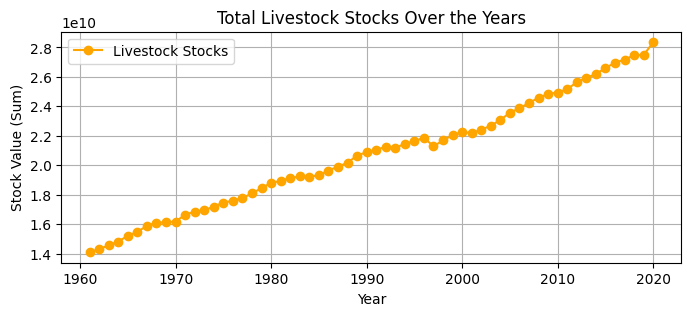

In [27]:
plt.figure(figsize=(8, 3)) # Livestock stock trend over the years
plt.plot(livestock_trend.index, livestock_trend.values, marker='o', color='orange', label="Livestock Stocks")
plt.title("Total Livestock Stocks Over the Years")
plt.xlabel("Year")
plt.ylabel("Stock Value (Sum)")
plt.legend()
plt.grid()
plt.show()

##### Regional comparison for top 10 regions by crop production

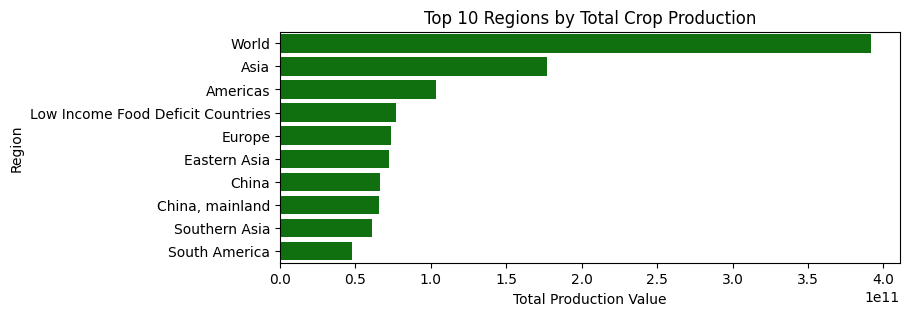

In [72]:
top_regions_crop = crop_df_cleaned.groupby('Area')['Value'].sum().nlargest(10) 
plt.figure(figsize=(8, 3))
sns.barplot(x=top_regions_crop.values, y=top_regions_crop.index, color ="green")
plt.title("Top 10 Regions by Total Crop Production")
plt.xlabel("Total Production Value")
plt.ylabel("Region")
plt.show()

##### Regional comparison for top 10 regions by livestock stocks

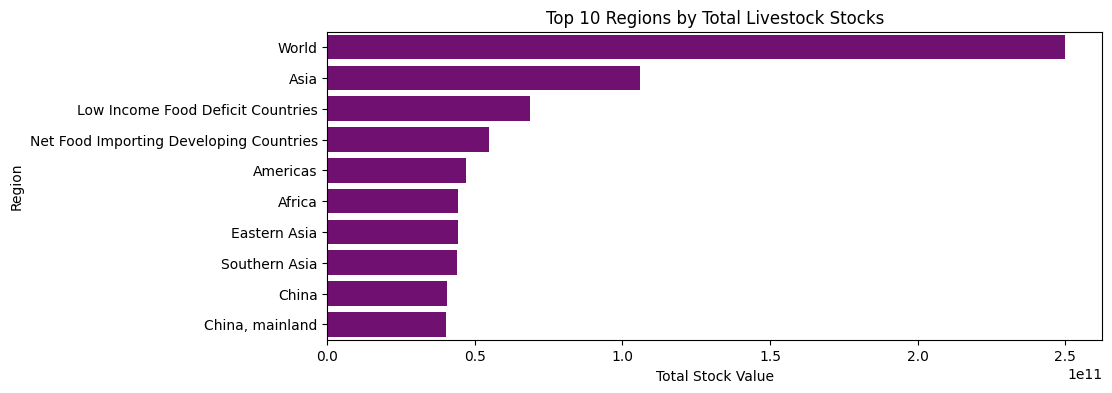

In [73]:
top_regions_livestock = live_df_cleaned.groupby('Area')['Value'].sum().nlargest(10) # 
plt.figure(figsize=(10, 4))
sns.barplot(x=top_regions_livestock.values, y=top_regions_livestock.index, color ="purple")
plt.title("Top 10 Regions by Total Livestock Stocks")
plt.xlabel("Total Stock Value")
plt.ylabel("Region")
plt.show()


##### Yearly average production and stock values

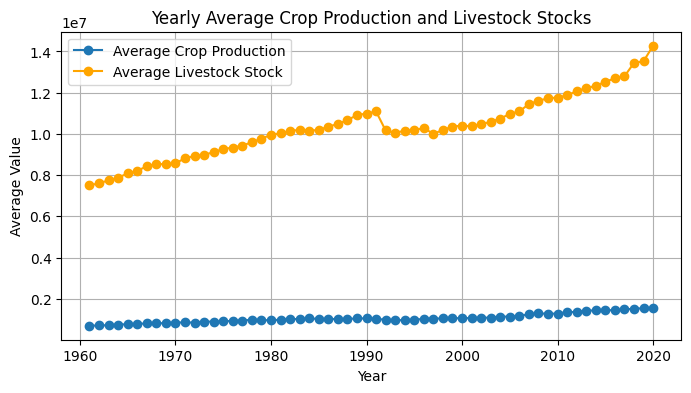

In [9]:
yearly_avg_crop = crop_df_cleaned.groupby('Year')['Value'].mean()
yearly_avg_livestock = live_df_cleaned.groupby('Year')['Value'].mean()

plt.figure(figsize=(8, 4))
plt.plot(yearly_avg_crop.index, yearly_avg_crop.values, label="Average Crop Production", marker='o')
plt.plot(yearly_avg_livestock.index, yearly_avg_livestock.values, label="Average Livestock Stock", marker='o', color='orange')
plt.title("Yearly Average Crop Production and Livestock Stocks")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend()
plt.grid()
plt.show()

#### Linear Regression - Predict production

##### Model training and evaluation : Crops

In [14]:

# Remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from crop data
crop_df_cleaned = remove_outliers(crop_df_cleaned, 'Value')

# Prepare the data for linear regression
X_crop = crop_df_cleaned[['Area', 'Item', 'Element']]  # Independent variables
y_crop = crop_df_cleaned['Value']                        # Dependent variable

# Define the column transformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Area', 'Item', 'Element'])
    ],
    remainder='passthrough'  # Keeps other columns (if any) in the dataset
)

# Create a pipeline that first transforms the data and then fits the linear regression model
pipeline_crop = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)

# Fit the model
pipeline_crop.fit(X_train_crop, y_train_crop)

# Make predictions
y_pred_crop = pipeline_crop.predict(X_test_crop)

# Evaluate the model
mse_crop = mean_squared_error(y_test_crop, y_pred_crop)
r2_crop = r2_score(y_test_crop, y_pred_crop)

print("Crop Production Linear Regression Predictions")
print("Mean Squared Error:", mse_crop)
print("R² Score:", r2_crop)

Crop Production Linear Regression Predictions
Mean Squared Error: 3818365484.910294
R² Score: 0.21350479617220042


##### Actual vs Predicted Values : Crop

Predicted values for Crop Production:
            Actual     Predicted
468420       200.0 -1.449438e+06
413435      4000.0 -3.071527e+06
235153     27950.0  3.233110e+06
1203252   129199.0  2.449705e+06
1668184   190845.0  5.083021e+06
...            ...           ...
1120469    14483.0  1.049728e+06
1159103       89.0  6.485116e+04
1527255    80660.0 -5.147015e+04
836526   1242400.0  2.070279e+06
372052    319871.0  1.170718e+06

[351268 rows x 2 columns]


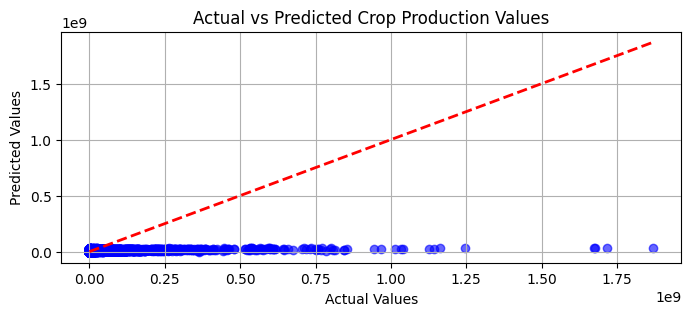

In [13]:
import matplotlib.pyplot as plt

# Print predicted values for crop production
print("Predicted values for Crop Production:")
predicted_values_crop = pd.DataFrame({'Actual': y_test_crop, 'Predicted': y_pred_crop})
print(predicted_values_crop)

# Plot actual vs predicted values
plt.figure(figsize=(8, 3))
plt.scatter(y_test_crop, y_pred_crop, color='blue', alpha=0.6)
plt.plot([y_test_crop.min(), y_test_crop.max()], [y_test_crop.min(), y_test_crop.max()], '--r', lw=2)  # Diagonal line
plt.title("Actual vs Predicted Crop Production Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

##### Model training and evaluation : Livestock

In [17]:
# Prepare the data for linear regression for livestock
X_livestock = live_df_cleaned[['Area', 'Item', 'Element']]  # Independent variables
y_livestock = live_df_cleaned['Value']                        # Dependent variable

# Define the column transformer for one-hot encoding
column_transformer_livestock = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Area', 'Item', 'Element'])
    ],
    remainder='passthrough'  # Keeps other columns (if any) in the dataset
)

# Create a pipeline that first transforms the data and then fits the linear regression model
pipeline_livestock = Pipeline(steps=[
    ('preprocessor', column_transformer_livestock),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train_livestock, X_test_livestock, y_train_livestock, y_test_livestock = train_test_split(X_livestock, y_livestock, test_size=0.2, random_state=42)

# Fit the model
pipeline_livestock.fit(X_train_livestock, y_train_livestock)

# Make predictions
y_pred_livestock = pipeline_livestock.predict(X_test_livestock)

# Evaluate the model
mse_livestock = mean_squared_error(y_test_livestock, y_pred_livestock)
r2_livestock = r2_score(y_test_livestock, y_pred_livestock)

print("Livestock Production Linear Regression Predictions")
print("Mean Squared Error:", mse_livestock)
print("R² Score:", r2_livestock)

Livestock Production Linear Regression Predictions
Mean Squared Error: 2111000068612377.8
R² Score: 0.30241562564141233


##### Actual and Predicted values : Livestock

Predicted values for Livestock Production:
          Actual     Predicted
81431   269000.0 -8.534789e+06
80318    68000.0 -3.707786e+06
90139  4472600.0  1.996996e+07
61153  6546177.0  2.110641e+07
61330  5366946.0  8.459536e+06
...          ...           ...
58589   919400.0 -6.371579e+06
51669      200.0 -2.151078e+07
83641   269938.0 -7.125415e+06
75587     6000.0 -9.966494e+06
50089    20000.0 -4.822156e+06

[23977 rows x 2 columns]


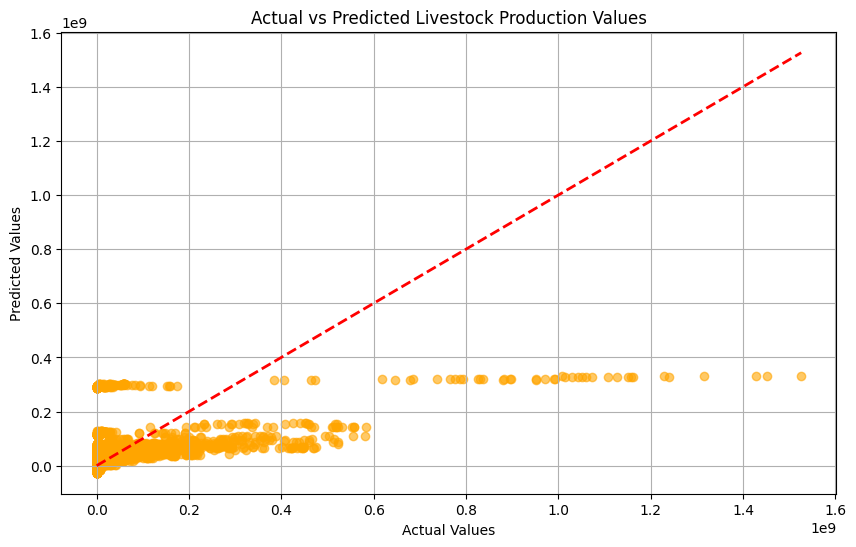

In [18]:
# Print predicted values for livestock production
print("Predicted values for Livestock Production:")
predicted_values_livestock = pd.DataFrame({'Actual': y_test_livestock, 'Predicted': y_pred_livestock})
print(predicted_values_livestock)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_livestock, y_pred_livestock, color='orange', alpha=0.6)
plt.plot([y_test_livestock.min(), y_test_livestock.max()], [y_test_livestock.min(), y_test_livestock.max()], '--r', lw=2)  # Diagonal line
plt.title("Actual vs Predicted Livestock Production Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

#### CNN

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np


# Data cleaning
crop_df_cleaned = crop_df[crop_df['Value'].notnull() & (crop_df['Value'] > 0)]
live_df_cleaned = live_df[live_df['Value'].notnull() & (live_df['Value'] > 0)]

# Encode categorical column 'Item'
label_encoder_crop = LabelEncoder()
crop_df_cleaned['Item_encoded'] = label_encoder_crop.fit_transform(crop_df_cleaned['Item'])

# Prepare features and target
X_crop = crop_df_cleaned[['Year', 'Item_encoded', 'Value']]
y_crop = crop_df_cleaned['Value']

# Split data
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_train_crop, X_val_crop, y_train_crop, y_val_crop = train_test_split(X_train_crop, y_train_crop, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_crop_scaled = scaler.fit_transform(X_train_crop)
X_val_crop_scaled = scaler.transform(X_val_crop)
X_test_crop_scaled = scaler.transform(X_test_crop)

# Reshape for CNN
X_train_cnn = np.expand_dims(X_train_crop_scaled, axis=-1)
X_val_cnn = np.expand_dims(X_val_crop_scaled, axis=-1)
X_test_cnn = np.expand_dims(X_test_crop_scaled, axis=-1)



C:\Users\nehay\AppData\Local\Temp\ipykernel_21420\1828681470.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df_cleaned['Item_encoded'] = label_encoder_crop.fit_transform(crop_df_cleaned['Item'])


In [14]:
# Ensure reshaped input is compatible with CNN
X_train_cnn = X_train_crop_scaled.reshape(-1, X_train_crop_scaled.shape[1], 1, 1)
X_val_cnn = X_val_crop_scaled.reshape(-1, X_val_crop_scaled.shape[1], 1, 1)
X_test_cnn = X_test_crop_scaled.reshape(-1, X_test_crop_scaled.shape[1], 1, 1)

# Build CNN model with fixed dimensions
input_dim = (X_train_cnn.shape[1], X_train_cnn.shape[2], 1)  # Corrected input shape
model = Sequential([
    Input(shape=input_dim),
    Conv2D(32, (2, 2), activation='relu', padding='same'),  # Added padding='same' to prevent dimension reduction
    MaxPooling2D((2, 2), padding='same'),  # Added padding='same' to handle small inputs
    Dropout(0.3),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Regression output
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_cnn, y_train_crop, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val_cnn, y_val_crop)
)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_cnn, y_test_crop)
print(f"Test MAE: {test_mae:.2f}")



Epoch 1/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 205s 6ms/step - loss: 151586944843776.0000 - mae: 1679697.7500 - val_loss: 7257077055488.0000 - val_mae: 1016201.1875
Epoch 2/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 178s 5ms/step - loss: 10844966486016.0000 - mae: 947755.5000 - val_loss: 4757369913344.0000 - val_mae: 807043.0000
Epoch 3/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 151s 5ms/step - loss: 9229441171456.0000 - mae: 799275.1250 - val_loss: 3625921019904.0000 - val_mae: 589308.8125
Epoch 4/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 162s 5ms/step - loss: 8696198332416.0000 - mae: 653224.5000 - val_loss: 2536692776960.0000 - val_mae: 535285.5625
Epoch 5/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - loss: 7041336737792.0000 - mae: 583925.5000 - val_loss: 1638052265984.0000 - val_mae: 425401.2812
Epoch 6/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 211s 6ms/step - loss: 7097808322560.0000 - mae: 474058.5625 - val_loss: 920544542720.0000 - val_mae: 339261.2812
Epoch 7/20
32932/32932 ━━━━━━━━━━━━━━━━━━━━ 368s

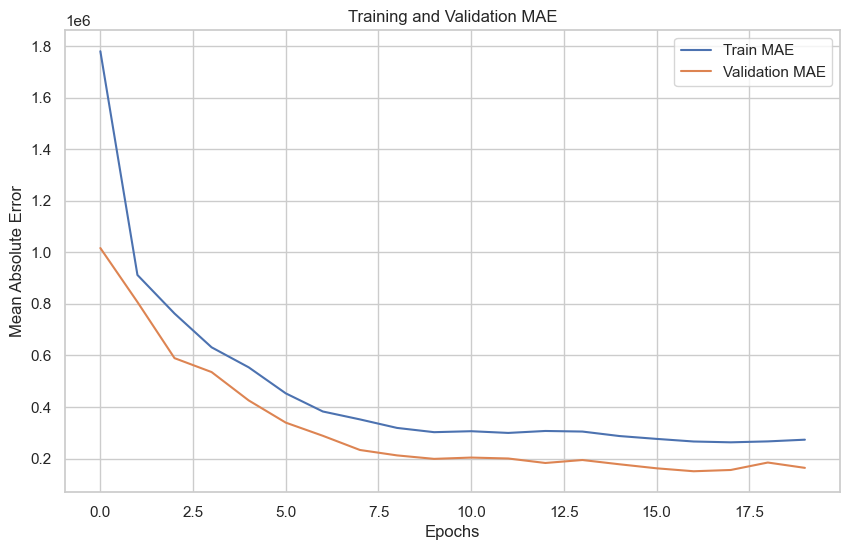

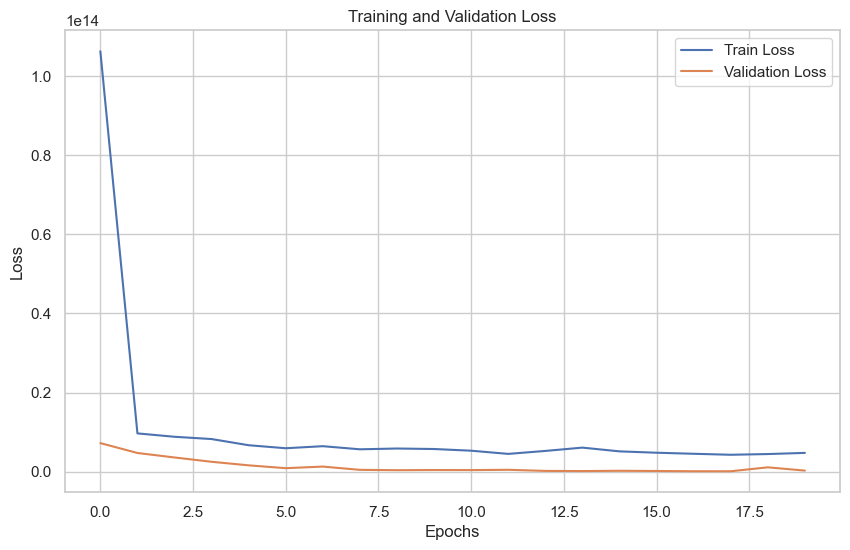

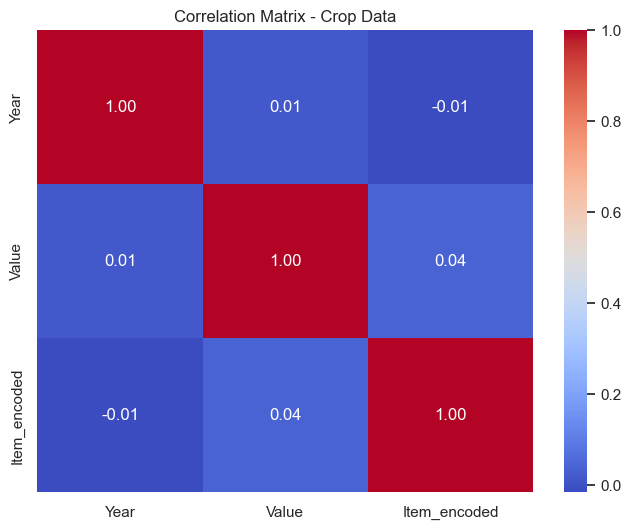

In [16]:
# Plot training and validation performance
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Heatmap for correlation matrix of crop data
numeric_cols_crop = crop_df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols_crop.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix - Crop Data")
plt.show()
